In [1]:
import pandas as pd


In [4]:
df=pd.read_csv(r"level2_annotation_runs\run_20260102_090441\level2_labeled.csv")

In [5]:
df.head()

,from,sender_domain,clean_text,deadline_date,label_source,label_topic,label_urgency
0,23DCS023 JAMES DHANDHUKIYA <23dcs023@charusat....,charusat.edu.in,request for email data contribution – research...,NaN,Student / Club,Assignment or Submission,NaN
1,23DCS023 JAMES DHANDHUKIYA <23dcs023@charusat....,charusat.edu.in,re: request for email data contribution – rese...,NaN,Student / Club,Assignment or Submission,NaN
2,NPTEL <onlinecourses@nptel.iitm.ac.in>,nptel.iitm.ac.in,nptel newsletter: iit madras code certificate ...,NaN,External Course Provider,Certification / Courses,NaN
3,Team at Read <support@e.read.ai>,e.read.ai,exclusive education pricing just for you! read...,NaN,Misc / External,General Information / Misc,NaN
4,Mohini Darji <mohinidarji.dcs@charusat.ac.in>,charusat.ac.in,reg. submission of sgp- weekly reports dear st...,NaN,Faculty / Academic Staff,Assignment or Submission,NaN


                                         count  percent
label_topic                                            
Unlabeled                                 1026    66.80
General Information / Misc                 206    13.41
Assignment or Submission                    56     3.65
Important Announcements                     50     3.26
Events / Hackathons                         43     2.80
6. Events / Hackathons                      33     2.15
Exam Notifications                          30     1.95
Certification / Courses                     24     1.56
5. Internship / Placement Opportunities     24     1.56
Internship / Placement Opportunities        22     1.43
Timetable / Schedule Update                 11     0.72
Administrative / Fees / Counselling          6     0.39
4. Certification / Courses                   2     0.13
8. Administrative / Fees / Counselling       1     0.07
7. Important Announcements                   1     0.07
9. General Information / Misc                1  

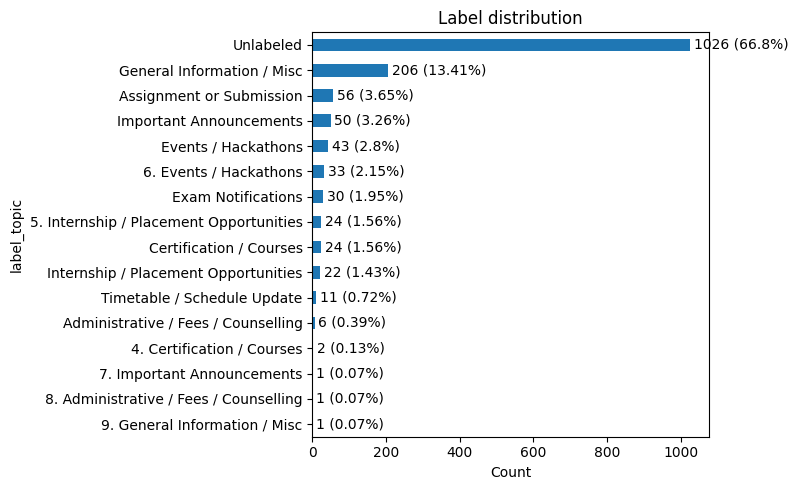

In [7]:
# show distribution of labels (counts + percentages) and plot a horizontal bar chart
label_series = df['label_topic'].fillna('Unlabeled')
counts = label_series.value_counts()
percents = label_series.value_counts(normalize=True).mul(100).round(2)
dist = pd.concat([counts, percents], axis=1, keys=['count', 'percent'])
print(dist)

import matplotlib.pyplot as plt

counts_sorted = counts.sort_values(ascending=True)
plt.figure(figsize=(8, 5))
ax = counts_sorted.plot(kind='barh', color='C0')
plt.xlabel('Count')
plt.title('Label distribution')
# annotate counts on bars
for i, (idx, v) in enumerate(counts_sorted.items()):
    ax.text(v + max(counts_sorted) * 0.01, i, f"{v} ({dist.loc[idx,'percent']}%)", va='center')
plt.tight_layout()
plt.show()

In [8]:
VALID_LABELS = {
    "Timetable / Schedule Update",
    "Exam Notifications",
    "Assignment or Submission",
    "Certification / Courses",
    "Internship / Placement Opportunities",
    "Events / Hackathons",
    "Important Announcements",
    "Administrative / Fees / Counselling",
    "General Information / Misc",
}


In [9]:
import re

def normalize_label(label):
    if not isinstance(label, str):
        return label
    label = label.strip()
    # remove leading numbering like "6. "
    label = re.sub(r"^\d+\.\s*", "", label)
    return label

df["label_topic"] = df["label_topic"].apply(normalize_label)


In [10]:
invalid = df.loc[
    df["label_topic"].notna() &
    (df["label_topic"] != "Unlabeled") &
    (~df["label_topic"].isin(VALID_LABELS)),
    "label_topic"
]

print(invalid.value_counts())


Series([], Name: count, dtype: int64)


                                      count  percent
label_topic                                         
Unlabeled                              1026    66.80
General Information / Misc              207    13.48
Events / Hackathons                      76     4.95
Assignment or Submission                 56     3.65
Important Announcements                  51     3.32
Internship / Placement Opportunities     46     2.99
Exam Notifications                       30     1.95
Certification / Courses                  26     1.69
Timetable / Schedule Update              11     0.72
Administrative / Fees / Counselling       7     0.46


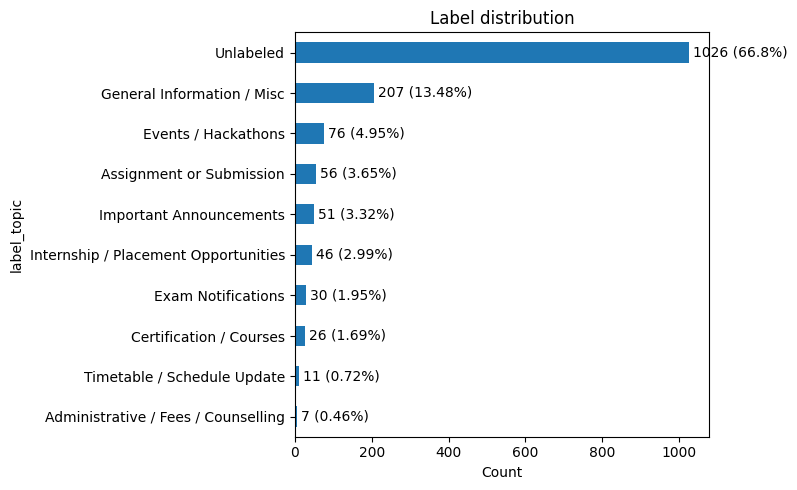

In [14]:
# show distribution of labels (counts + percentages) and plot a horizontal bar chart
label_series = df['label_topic'].fillna('Unlabeled')
counts = label_series.value_counts()
percents = label_series.value_counts(normalize=True).mul(100).round(2)
dist = pd.concat([counts, percents], axis=1, keys=['count', 'percent'])
print(dist)

import matplotlib.pyplot as plt

counts_sorted = counts.sort_values(ascending=True)
plt.figure(figsize=(8, 5))
ax = counts_sorted.plot(kind='barh', color='C0')
plt.xlabel('Count')
plt.title('Label distribution')
# annotate counts on bars
for i, (idx, v) in enumerate(counts_sorted.items()):
    ax.text(v + max(counts_sorted) * 0.01, i, f"{v} ({dist.loc[idx,'percent']}%)", va='center')
plt.tight_layout()
plt.show()

In [18]:
df.to_csv("level_2_fixed_3rd_jan.csv",index=False)